In [47]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants
from scipy.interpolate import interp1d
from scipy.optimize import fmin
import lmfit

%matplotlib notebook

from pplot.init_nb_plotting import *
from pplot import plots
from pplot import tools

In [120]:
def get_sample_data():
    data = np.loadtxt('./from_Pekola/NIS3_97mK.txt').T
    I = data[0,:]
    V = data[1,:]
    return I, V
    

def smooth(x, window_len=10):
    s = np.r_[x[window_len-1:0:-1], x, x[-2:-window_len-1:-1]]
    w = np.ones(window_len,'d')
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y[int(window_len/2-1):int(-window_len/2)]


def find_offset(i, v, i_th=0.05, delta=1e-9, max_it=100, smooth_win=50):
    ifunc = interp1d(v, smooth(i, smooth_win))
    v_guess = v[np.argmin(abs(i-i_th))]
    v_pos = v_guess
    v_neg = -v_guess
    v_of = 0
    i_of = 0
    
    while k < max_it:  
        v_pos = fmin(lambda v: abs(ifunc(v+v_of)-i_th-i_of), v_pos, disp=0, xtol=1e-8, ftol=1e-8)
        v_neg = fmin(lambda v: abs(ifunc(v+v_of)+i_th-i_of), v_neg, disp=0, xtol=1e-8, ftol=1e-8)
        v_of_new = v_of + (v_pos+v_neg)/2.

        if abs(v_of - v_of_new) < delta:
            v_of = v_of_new
            i_of = ifunc(v_of)
            break

        v_of = v_of_new
        i_of = ifunc(v_of)
        
        return i_of, v_of

In [121]:
i, v = get_sample_data()
i *= 1e9
v *= 1e6
i_of, v_of = find_offset(i, v)
i -= i_of
v -= v_of

<IPython.core.display.Javascript object>


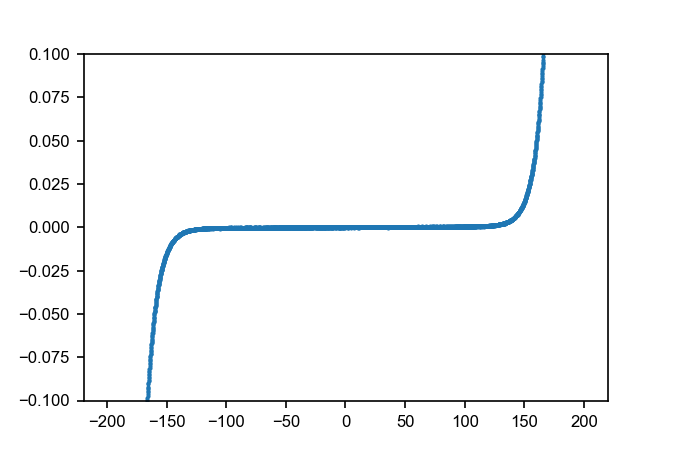

(-0.1, 0.1)

In [125]:
fig, ax = plt.subplots(1,1)
ax.plot(v, i, 'o', ms=1)
ax.set_ylim(-0.1, 0.1)

In [62]:
ifunc(v_pos)

array([ 0.0854689])